In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

hospital_data_to_load = "cdmx_hospitals.csv"
cdmx_hospitals = pd.read_csv(hospital_data_to_load, encoding='latin-1')
insurance_data_to_load = "insured_population.csv"
population_insured = pd.read_csv(insurance_data_to_load)
population_insured.set_index('CLAVE DE LA INSTITUCION', inplace=True)
bed_data_to_load = "comparison_beds.csv"
comparison_beds = pd.read_csv(bed_data_to_load)
comparison_beds.set_index('CLAVE DE LA INSTITUCION', inplace=True)


In [2]:
population_insured

,population_insured
CLAVE DE LA INSTITUCION,
IMSS,3233124
ISSSTE,1096209
PEMEX,101922
SMP,605038
SSA,2009093
OTHERS,152621


In [3]:
comparison_beds

,beds per 1000
CLAVE DE LA INSTITUCION,
EUROPEAN UNION AVERAGE,6.42
USA AVERAGE,3.30
EL SALVADOR AVERAGE,1.65


In [4]:
cdmx_hospitals.head()

,Unnamed: 0,CLUES,NOMBRE DE LA ENTIDAD,NOMBRE DEL MUNICIPIO,NOMBRE DE LA LOCALIDAD,NOMBRE DE LA JURISDICCION,CLAVE DE LA INSTITUCION,NOMBRE DE TIPOLOGIA,CONSULTORIOS DE MED GRAL,CONSULTORIOS EN OTRAS AREAS,...,CAMAS EN AREA DE HOS,CAMAS EN OTRAS AREAS,TOTAL DE CAMAS,NOMBRE DE LA UNIDAD,OBSERVACIONES DE LA DIRECCION,CODIGO POSTAL,ESTATUS DE OPERACION,LONGITUD,LATITUD,NIVEL ATENCION
0,6399,DFCRO000011,CIUDAD DE MEXICO,MIGUEL HIDALGO,MIGUEL HIDALGO,MIGUEL HIDALGO,CRO,NO ESPECIFICADO,5,0,...,60,0,60,CENTRO DE TRAUMA DE CRUZ ROJA MEXICANA EN EL D...,"AV. EJÃRCITO NACIONAL NO. 1032, COLONIA LOS M...",11510.0,EN OPERACION,-99.2088913,19.438531,SEGUNDO NIVEL
1,6505,DFIMS000020,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,IMSS,HOSPITAL DE ESPECIALIDADES,75,0,...,465,0,465,HES CM LA RAZA,"SERIS Y ZAACHILA COL. LA RAZA C.P. 02990, AZC...",2990.0,EN OPERACION,-99.1442,19.466200,TERCER NIVEL
2,6507,DFIMS000044,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,IMSS,HOSPITAL DE GINECO-OBSTETRICIA,31,0,...,306,0,306,HGO CM LA RAZA,CLZD. VALLEJO ESQ. ANTONIO VALERIANO COL. LA ...,2990.0,EN OPERACION,-99.1470262,19.466440,SEGUNDO NIVEL
3,6508,DFIMS000056,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,IMSS,HOSPITAL INFECTOLOGÃA,6,0,...,148,0,148,HINFEC CM LA RAZA,ZAACHILA Y JACARANDAS S/N COL. LA RAZA C.P. 0...,2990.0,EN OPERACION,-99.144716,19.466279,TERCER NIVEL
4,6509,DFIMS000061,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,IMSS,HOSPITAL GENERAL,69,0,...,523,0,523,HG CM LA RAZA,CLZD. VALLEJO Y JACARANDAS COL. LA RAZA C.P. ...,2990.0,EN OPERACION,-99.182,19.486000,SEGUNDO NIVEL


In [5]:
cdmx_hospitals = cdmx_hospitals.rename(columns={"TOTAL DE CAMAS":"camas"})
hospitals_inst = pd.DataFrame(cdmx_hospitals.groupby(["CLAVE DE LA INSTITUCION"]).camas.sum())
hospitals_inst

,camas
CLAVE DE LA INSTITUCION,
CRO,60
IMSS,5989
ISSSTE,1848
PEMEX,240
SEDENA,1031
SEMAR,141
SME,30
SMP,5420
SSA,7390


In [6]:
hospitals_institutions = hospitals_inst.loc[["IMSS", "ISSSTE", "PEMEX", "SMP", "SSA"]]
others = hospitals_inst.loc[["CRO", "SEDENA", "SEMAR", "SME"]]
OTHERS = others["camas"].sum()
other_inst = pd.DataFrame({"camas": [OTHERS]})
other_inst = other_inst.rename(index={0:'OTHERS'})
hospitals_all_beds = hospitals_institutions.append(other_inst)
hospitals_all_beds

,camas
IMSS,5989
ISSSTE,1848
PEMEX,240
SMP,5420
SSA,7390
OTHERS,1262


In [7]:
cdmx_hospitals = cdmx_hospitals.rename(columns={"NOMBRE DE LA UNIDAD":"nombre_hospital"})
hospitals_number_all = pd.DataFrame(cdmx_hospitals.groupby(["CLAVE DE LA INSTITUCION"]).nombre_hospital.count())
hospitals_number_all

,nombre_hospital
CLAVE DE LA INSTITUCION,
CRO,1
IMSS,29
ISSSTE,8
PEMEX,2
SEDENA,8
SEMAR,1
SME,1
SMP,451
SSA,55


In [8]:
hospitals_number = hospitals_number_all.loc[["IMSS", "ISSSTE", "PEMEX", "SMP", "SSA"]]
number_others1 = hospitals_number_all.loc[["CRO", "SEDENA", "SEMAR", "SME"]]
numb_others = number_others1["nombre_hospital"].sum()
numb_others = pd.DataFrame({"nombre_hospital": [numb_others]})
numb_others = numb_others.rename(index={0:'OTHERS'})
hospitals_all_number = hospitals_number.append(numb_others)
hospitals_all_number

,nombre_hospital
IMSS,29
ISSSTE,8
PEMEX,2
SMP,451
SSA,55
OTHERS,11


In [9]:
df_institutions = hospitals_all_number.join(hospitals_all_beds, how="outer")
df_institutions = df_institutions.rename(columns={"nombre_hospital" : "number_of_hospitals"})
df_institutions = df_institutions.join(population_insured, how="outer")
df_institutions

,number_of_hospitals,camas,population_insured
CLAVE DE LA INSTITUCION,,,
IMSS,29,5989,3233124
ISSSTE,8,1848,1096209
PEMEX,2,240,101922
SMP,451,5420,605038
SSA,55,7390,2009093
OTHERS,11,1262,152621


In [10]:
df_institutions['beds per 1000'] = (df_institutions['camas']/df_institutions['population_insured'])*1000
df_institutions

,number_of_hospitals,camas,population_insured,beds per 1000
CLAVE DE LA INSTITUCION,,,,
IMSS,29,5989,3233124,1.852388
ISSSTE,8,1848,1096209,1.685810
PEMEX,2,240,101922,2.354742
SMP,451,5420,605038,8.958115
SSA,55,7390,2009093,3.678277
OTHERS,11,1262,152621,8.268849


In [11]:
beds= df_institutions.sort_values("beds per 1000", ascending=False)
beds

,number_of_hospitals,camas,population_insured,beds per 1000
CLAVE DE LA INSTITUCION,,,,
SMP,451,5420,605038,8.958115
OTHERS,11,1262,152621,8.268849
SSA,55,7390,2009093,3.678277
PEMEX,2,240,101922,2.354742
IMSS,29,5989,3233124,1.852388
ISSSTE,8,1848,1096209,1.685810


In [12]:
sum_beds = beds[["camas"]]
sum_beds = sum_beds.sort_values("camas", ascending=False)

In [13]:
beds.to_csv('beds_per_capita.csv')

In [14]:
beds_plot = beds[['beds per 1000']]
beds_plot = beds_plot.sort_values("beds per 1000", ascending=True)
beds_plot

,beds per 1000
CLAVE DE LA INSTITUCION,
ISSSTE,1.685810
IMSS,1.852388
PEMEX,2.354742
SSA,3.678277
OTHERS,8.268849
SMP,8.958115


In [15]:
hospitals = df_institutions[["number_of_hospitals"]]
hospitals = hospitals.sort_values("number_of_hospitals", ascending=True)
hospitals

,number_of_hospitals
CLAVE DE LA INSTITUCION,
PEMEX,2
ISSSTE,8
OTHERS,11
IMSS,29
SSA,55
SMP,451


In [16]:
beds_compared = beds_plot.append(comparison_beds)
beds_compared = beds_compared.sort_values("beds per 1000", ascending=True)
beds_compared

,beds per 1000
CLAVE DE LA INSTITUCION,
EL SALVADOR AVERAGE,1.650000
ISSSTE,1.685810
IMSS,1.852388
PEMEX,2.354742
USA AVERAGE,3.300000
SSA,3.678277
EUROPEAN UNION AVERAGE,6.420000
OTHERS,8.268849
SMP,8.958115


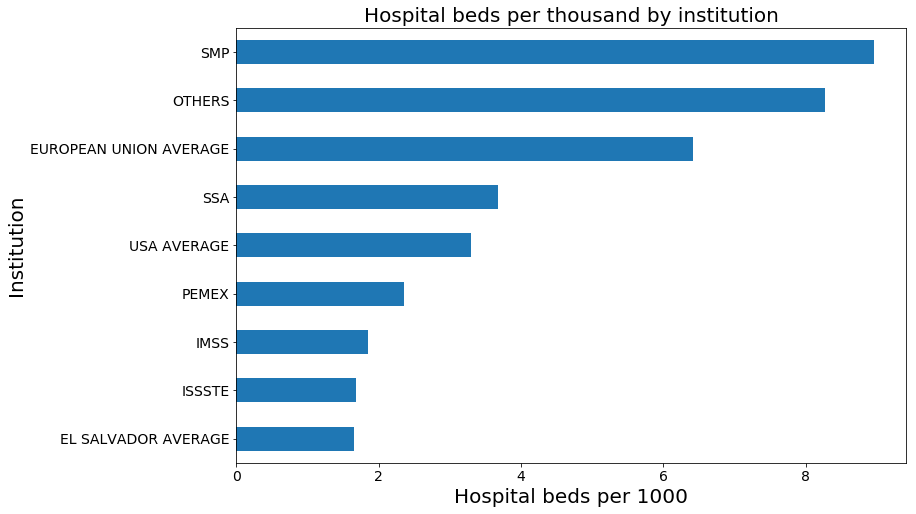

In [17]:
beds_compared.plot(kind="barh", figsize=(12,8), legend = False)
plt.title("Hospital beds per thousand by institution").set_size(20)
plt.xlabel("Hospital beds per 1000").set_size(20)
plt.ylabel("Institution").set_size(20)
plt.tick_params(axis="x", labelsize=14) 
plt.tick_params(axis="y", labelsize=14)
plt.savefig("beds_capita_institution_compared_hor.png")
plt.show()

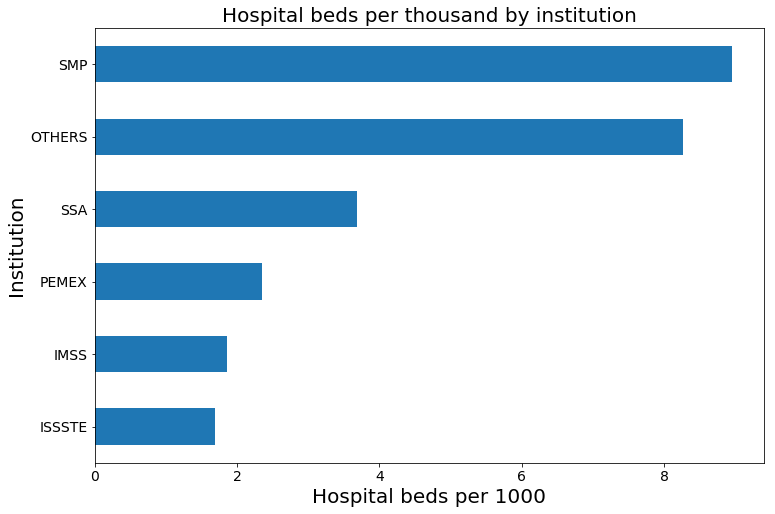

In [18]:
beds_plot.plot(kind="barh", figsize=(12,8), legend = False)
plt.title("Hospital beds per thousand by institution").set_size(20)
plt.xlabel("Hospital beds per 1000").set_size(20)
plt.ylabel("Institution").set_size(20)
plt.tick_params(axis="x", labelsize=14) 
plt.tick_params(axis="y", labelsize=14)
plt.savefig("beds_capita_institution_hor.png")
plt.show()

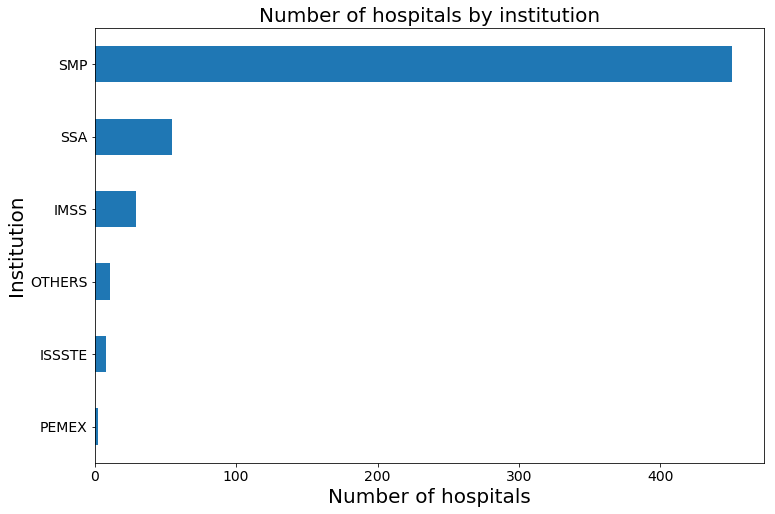

In [19]:
hospitals.plot(kind="barh", figsize=(12,8), legend = False)
plt.title("Number of hospitals by institution").set_size(20)
plt.xlabel("Number of hospitals").set_size(20)
plt.ylabel("Institution").set_size(20)
plt.tick_params(axis="x", labelsize=14) 
plt.tick_params(axis="y", labelsize=14)
plt.savefig("hospitals_institution_hor.png")
plt.show()


In [20]:
hospitals.reset_index(level=0, inplace=True)
hospitals

,CLAVE DE LA INSTITUCION,number_of_hospitals
0,PEMEX,2
1,ISSSTE,8
2,OTHERS,11
3,IMSS,29
4,SSA,55
5,SMP,451


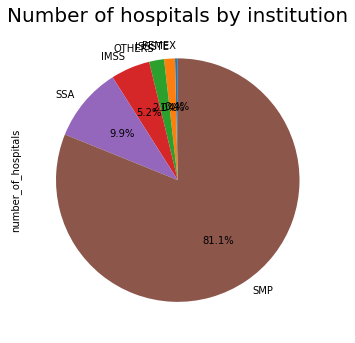

In [21]:
plt.figure(figsize=(12,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
hospitals.plot(kind='pie', y = 'number_of_hospitals', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=hospitals["CLAVE DE LA INSTITUCION"], legend = False, fontsize=10)
plt.title("Number of hospitals by institution").set_size(20)
plt.savefig("hospitals_institution_pie.png")
plt.show()


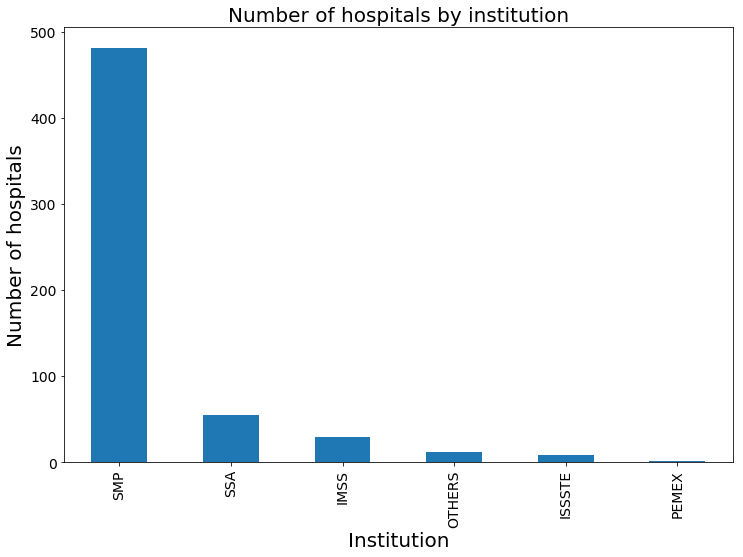

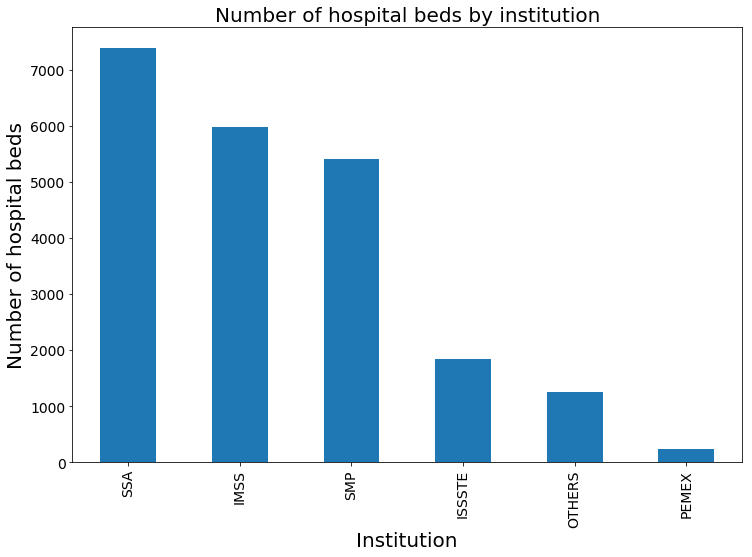

In [213]:
sum_beds.plot(kind="bar", figsize=(12,8), legend = False)
plt.title("Number of hospital beds by institution").set_size(20)
plt.xlabel("Institution").set_size(20)
plt.ylabel("Number of hospital beds").set_size(20)
plt.tick_params(axis="x", labelsize=14) 
plt.tick_params(axis="y", labelsize=14)
plt.savefig("beds_institution.png")
plt.show()